<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customer-Segmentation-for-a-Credit-Card-Company" data-toc-modified-id="Customer-Segmentation-for-a-Credit-Card-Company-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customer Segmentation for a Credit Card Company</a></span><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Summary-of-results" data-toc-modified-id="Summary-of-results-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Summary of results</a></span></li></ul></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kmeans</a></span><ul class="toc-item"><li><span><a href="#Selecting-K" data-toc-modified-id="Selecting-K-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Selecting K</a></span></li><li><span><a href="#Comparing-Clusters" data-toc-modified-id="Comparing-Clusters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparing Clusters</a></span></li></ul></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hierarchical Clustering</a></span><ul class="toc-item"><li><span><a href="#Building-a-agglomerative-clustering-model" data-toc-modified-id="Building-a-agglomerative-clustering-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Building a agglomerative clustering model</a></span></li><li><span><a href="#Selecting-the-number-of-clusters-and-comparison" data-toc-modified-id="Selecting-the-number-of-clusters-and-comparison-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Selecting the number of clusters and comparison</a></span></li></ul></li></ul></div>

# Customer Segmentation for a Credit Card Company

[mahshidxyz](http://www.github.com/mahshidxyz)

November 2020

---

## Problem statement

This project is about customer segmentation for a credit card company. One way to reduce the costs associated with credit card signup incentives and offering successful marketing campaigns is to offer credit cards with carefully targeted benefits that will attract new cardholders. The goal of customer segmentation here is to get an idea of popular benefits to associate with each new card offering. To study the various kinds of users who use the company’s products we are looking at the user data over a 6 month period. The data consists of 8950 rows (one for each cardholder) organized in columns with descriptive headers. The data has been provided by J. Patrick Weller. Currently this data is not publicly available. 

**Column label information:**
* CUST_ID : Credit card holder ID
* BALANCE : Monthly average balance (based on daily balance averages)
* BALANCE_FREQUENCY : Ratio of last 12 months with balance
* PURCHASES : Total purchase amount spent during last 12 months
* ONEOFF_PURCHASES : Total amount of one-off purchases
* INSTALLMENTS_PURCHASES : Total amount of installment purchases
* CASH_ADVANCE : Total cash-advance amount
* PURCHASES_FREQUENCY : Frequency of purchases (percentage of months with at least one purchase)
* ONEOFF_PURCHASES_FREQUENCY : Frequency of one-off-purchases
* PURCHASES_INSTALLMENTS_FREQUENCY : Frequency of installment purchases
* CASH_ADVANCE_FREQUENCY : Cash-Advance frequency
* AVERAGE_PURCHASE_TRX : Average amount per purchase transaction
* CASH_ADVANCE_TRX : Average amount per cash-advance transaction
* PURCHASES_TRX : Average amount per purchase transaction
* CREDIT_LIMIT : Credit limit
* PAYMENTS : Total payments (due amount paid by the customer to decrease their statement balance) in the period


## Summary of results

I used Kmeans and Hierarchical Clustering to segment customers. Both methods resulted in comparable outcomes. I identified 4 clusters with the following descriptions:

* Cluster 1: Low balance, infrequent users. Mostly use the card for one off purchases and cash advances. Rarely pay the balance in full. Low credit limit.

* Cluster 2: Low balance, frequent users. Don't spend too much money with this card but use it frequently for small purchases. Rarely do cash advance. Low credit limit. 

* Cluster 3: High balance driven by frequent cash advance not purchases. Prefer to pay for everything in cash! Rarely pay the balance in full. High credit limit. 

* Cluster 4: High balance driven by frequent purchases (both one-off purchases and installments), not so much by cash advances. Use credit to pay for everything!. High credit limit. 

**Reommendation:**

Here I came up with some simple offer components that can be attractive to different customer segments. Tailoring these offers requires a lot of knowledge about the costs associated with each type of offer. 

* Offer low APR for customers who rarely pay their balance in full (cluster # 1 and # 3)
* Offer low cash advance fee for customers who frequently take cash advances (cluster # 3)
* Offer sign up bonuses (e.g. \\$200 bonus if you spend \\$500 in the first 3 months) for customers with low balance, customers who use their cards frequently but for small purchases or do not use it often (cluster # 1 and # 2)
* Offer higher cash back for high spenders and frequent users (stay competitive in the credit card space) to retain customers (cluster # 1 and # 4)

# Exploring the data

## Import modules

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import davies_bouldin_score, silhouette_score


from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_columns", None)
sns.set_context("poster", font_scale=1.2)
# warnings.filterwarnings('ignore')

## Helper functions

In [2]:
def print_full(x):
    pd.set_option("display.max_rows", len(x))
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 2000)
    pd.set_option("display.float_format", "{:20,.2f}".format)
    pd.set_option("display.max_colwidth", None)
    print(x)
    pd.reset_option("display.max_rows")
    pd.reset_option("display.max_columns")
    pd.reset_option("display.width")
    pd.reset_option("display.float_format")
    pd.reset_option("display.max_colwidth")


def col_name_cleaner(df):
    df.columns = [column.replace("(", "") for column in df.columns]
    df.columns = [column.replace(")", "") for column in df.columns]
    df.columns = [column.replace(" ", "_") for column in df.columns]
    df.columns = [column.replace("/", "_") for column in df.columns]
    df.columns = [column.lower() for column in df.columns]

## Import data

In [3]:
df = pd.read_csv("cc_info.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
## Checking for data types and nulls and converting to lowercase the column names
col_name_cleaner(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [5]:
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8636 non-null   object 
 1   balance                           8636 non-null   float64
 2   balance_frequency                 8636 non-null   float64
 3   purchases                         8636 non-null   float64
 4   oneoff_purchases                  8636 non-null   float64
 5   installments_purchases            8636 non-null   float64
 6   cash_advance                      8636 non-null   float64
 7   purchases_frequency               8636 non-null   float64
 8   oneoff_purchases_frequency        8636 non-null   float64
 9   purchases_installments_frequency  8636 non-null   float64
 10  cash_advance_frequency            8636 non-null   float64
 11  cash_advance_trx                  8636 non-null   int64  
 12  purcha

In [7]:
## Checking for duplicates in cust_id: all good
df.cust_id.nunique()

8636

## EDA

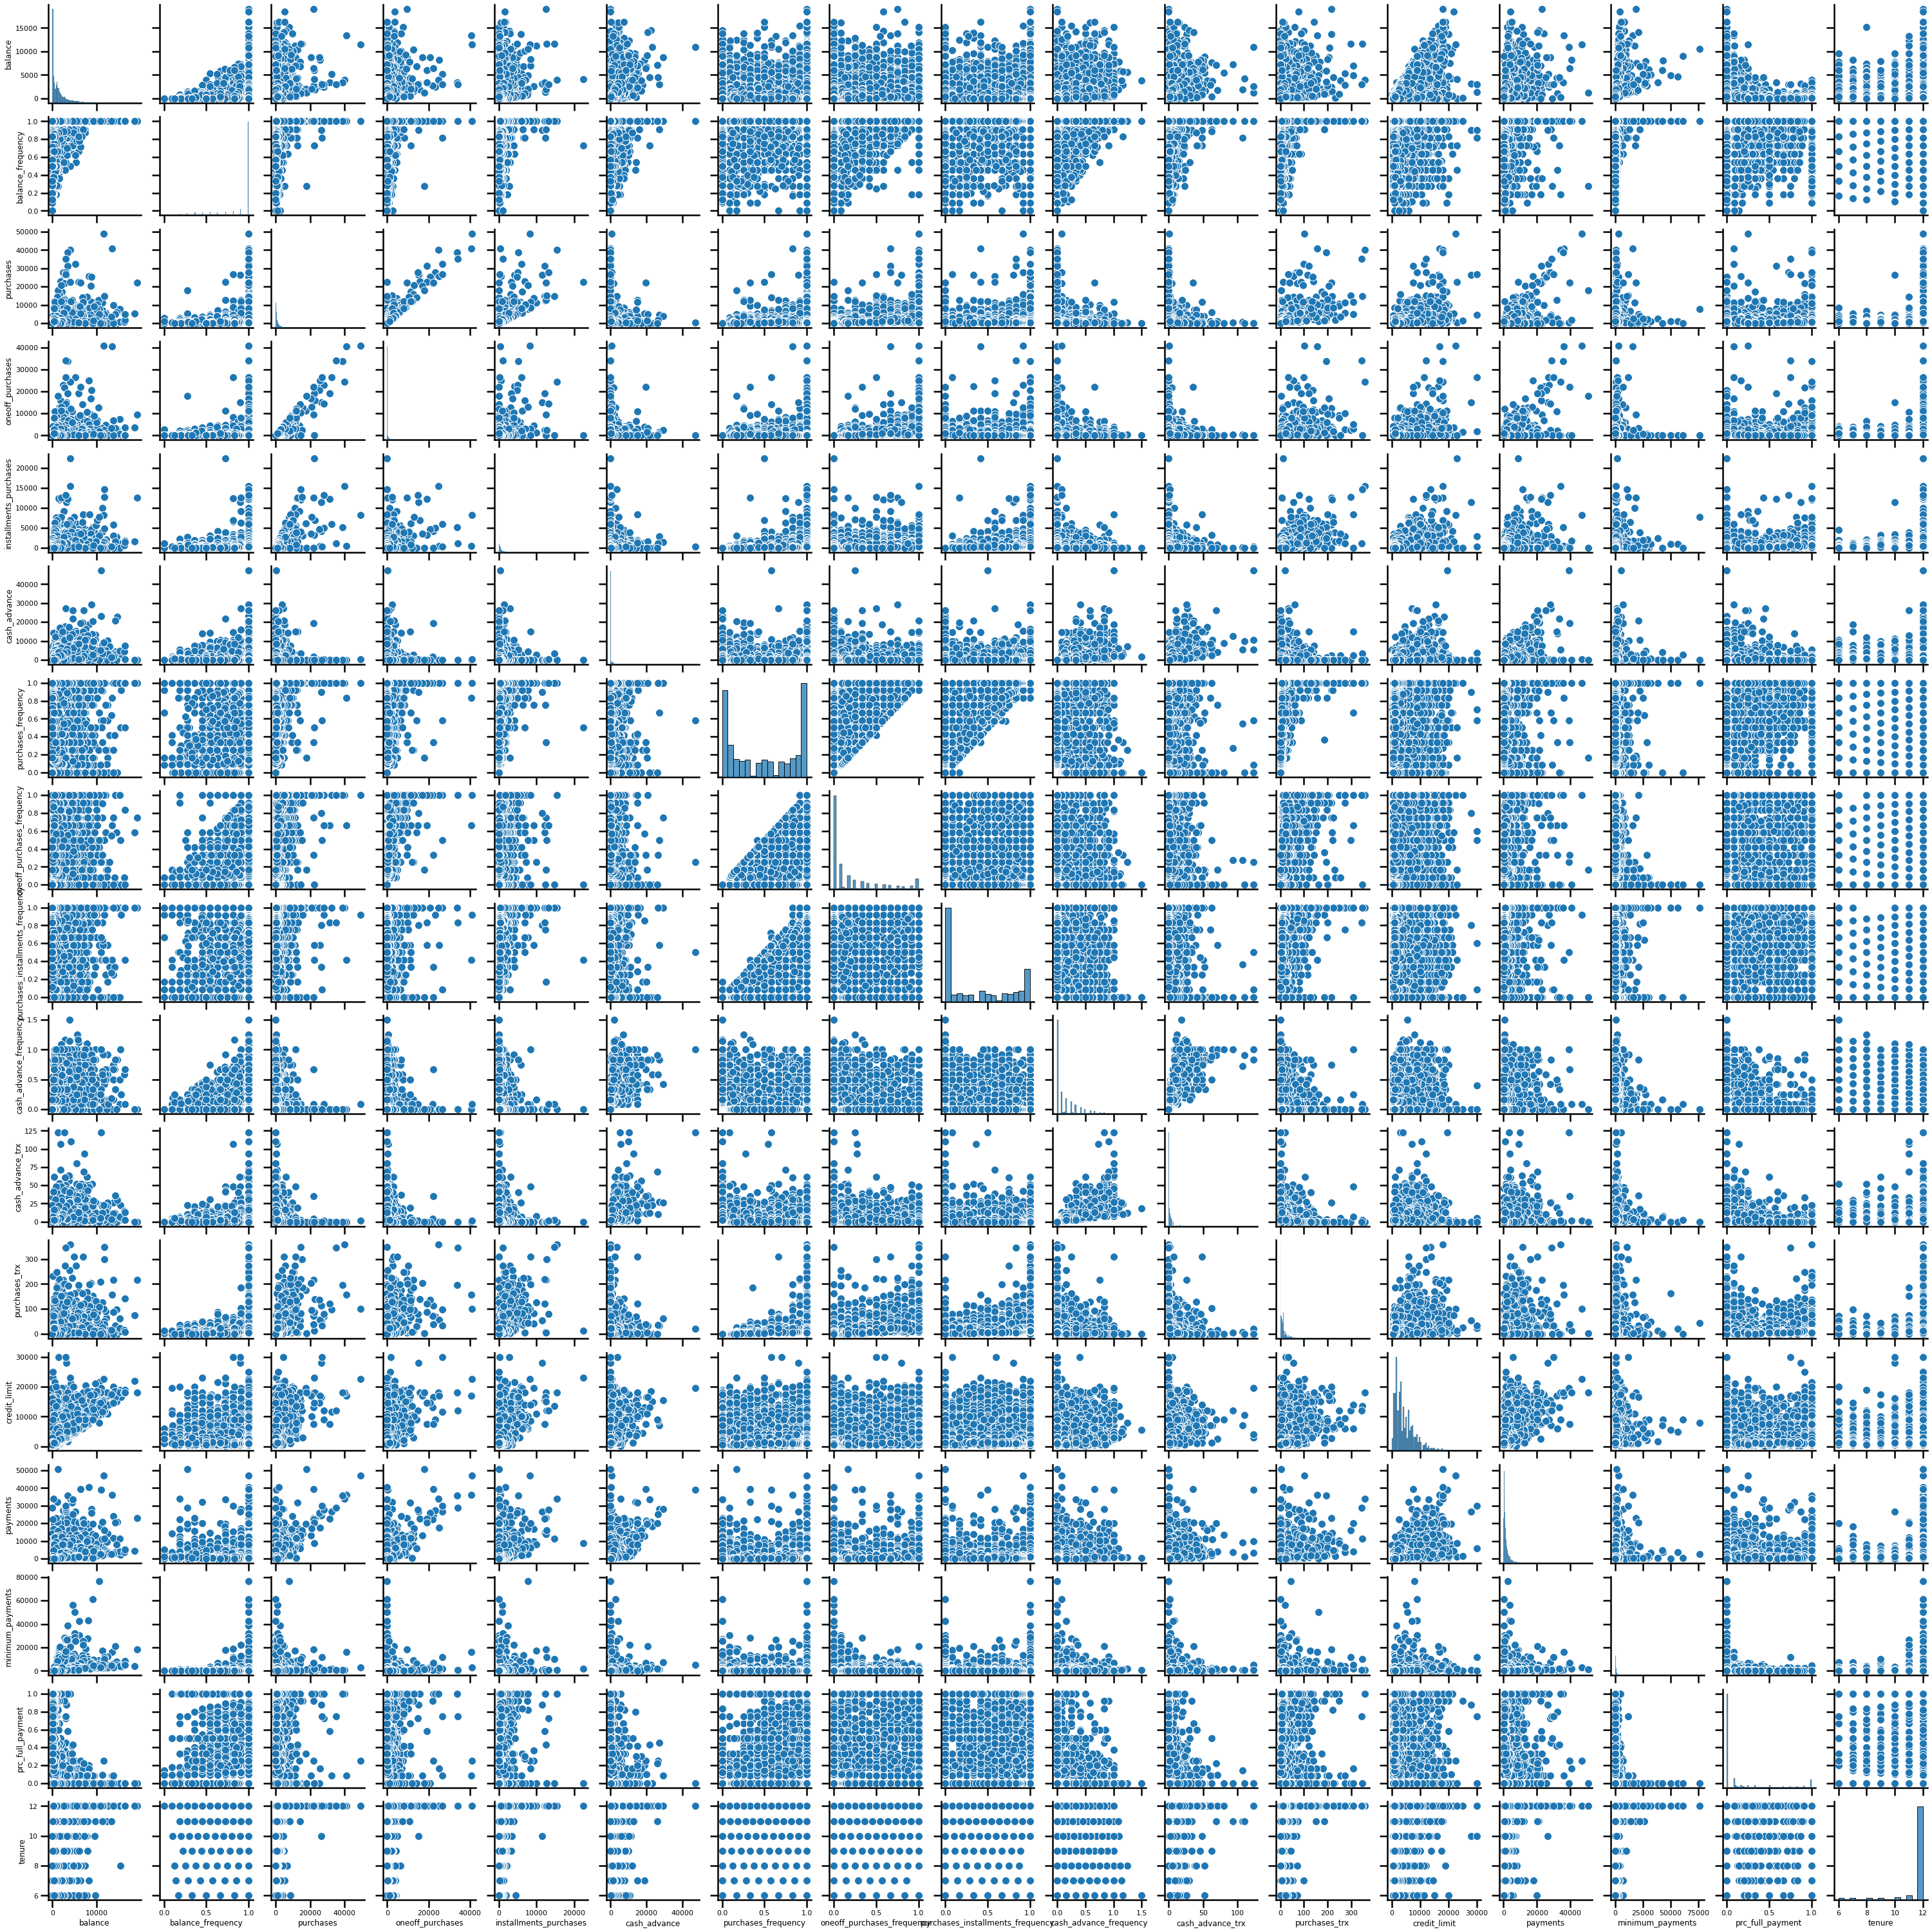

In [8]:
## Pair plots, no obvious clusters stand out
sns.set_context("poster", font_scale=0.5)
sns.pairplot(df.iloc[:, 1:])

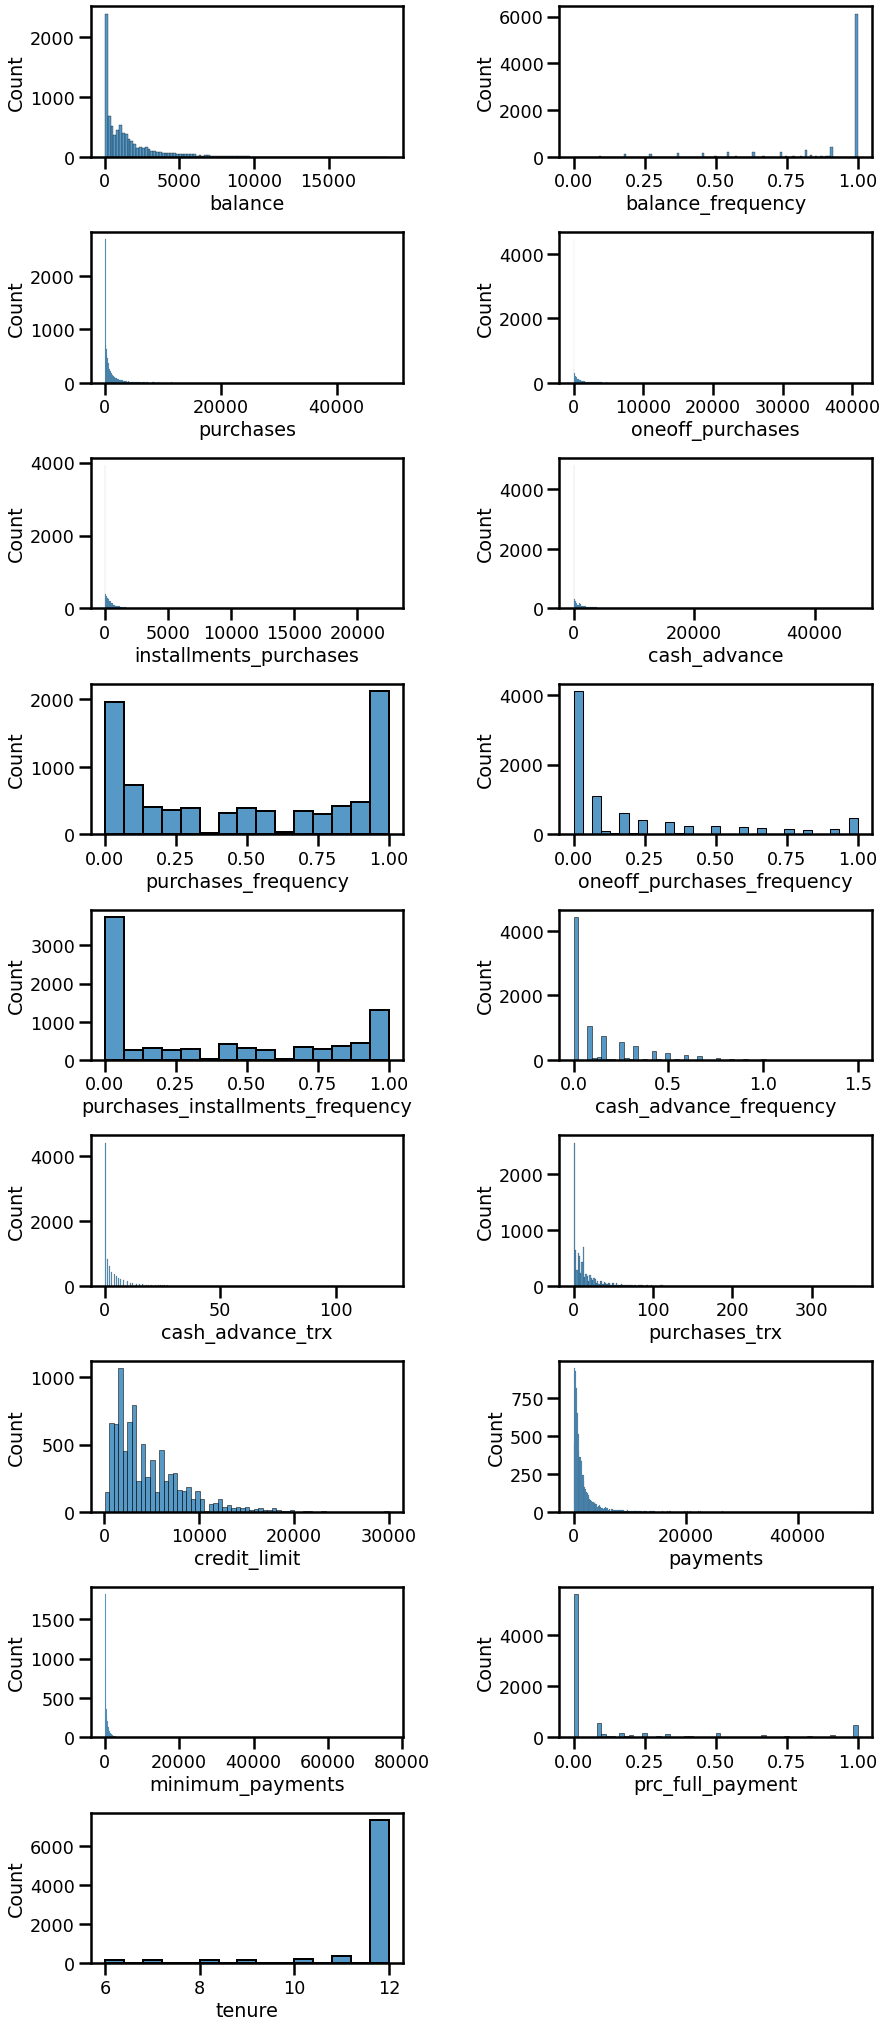

In [9]:
## Plot histograms
sns.set_context("poster", font_scale=0.8)
n_cols = len(df.columns)

fig, ax = plt.subplots((n_cols) // 2, 2, figsize=(14, 2 * (n_cols)))


for i in range(1, n_cols):
    sns.histplot(df.iloc[:, i], ax=ax[(i - 1) // 2][(i - 1) % 2])
    ax[(i - 1) // 2][(i - 1) % 2].set_xlabel(df.columns[i])

fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.delaxes(ax[8][1])

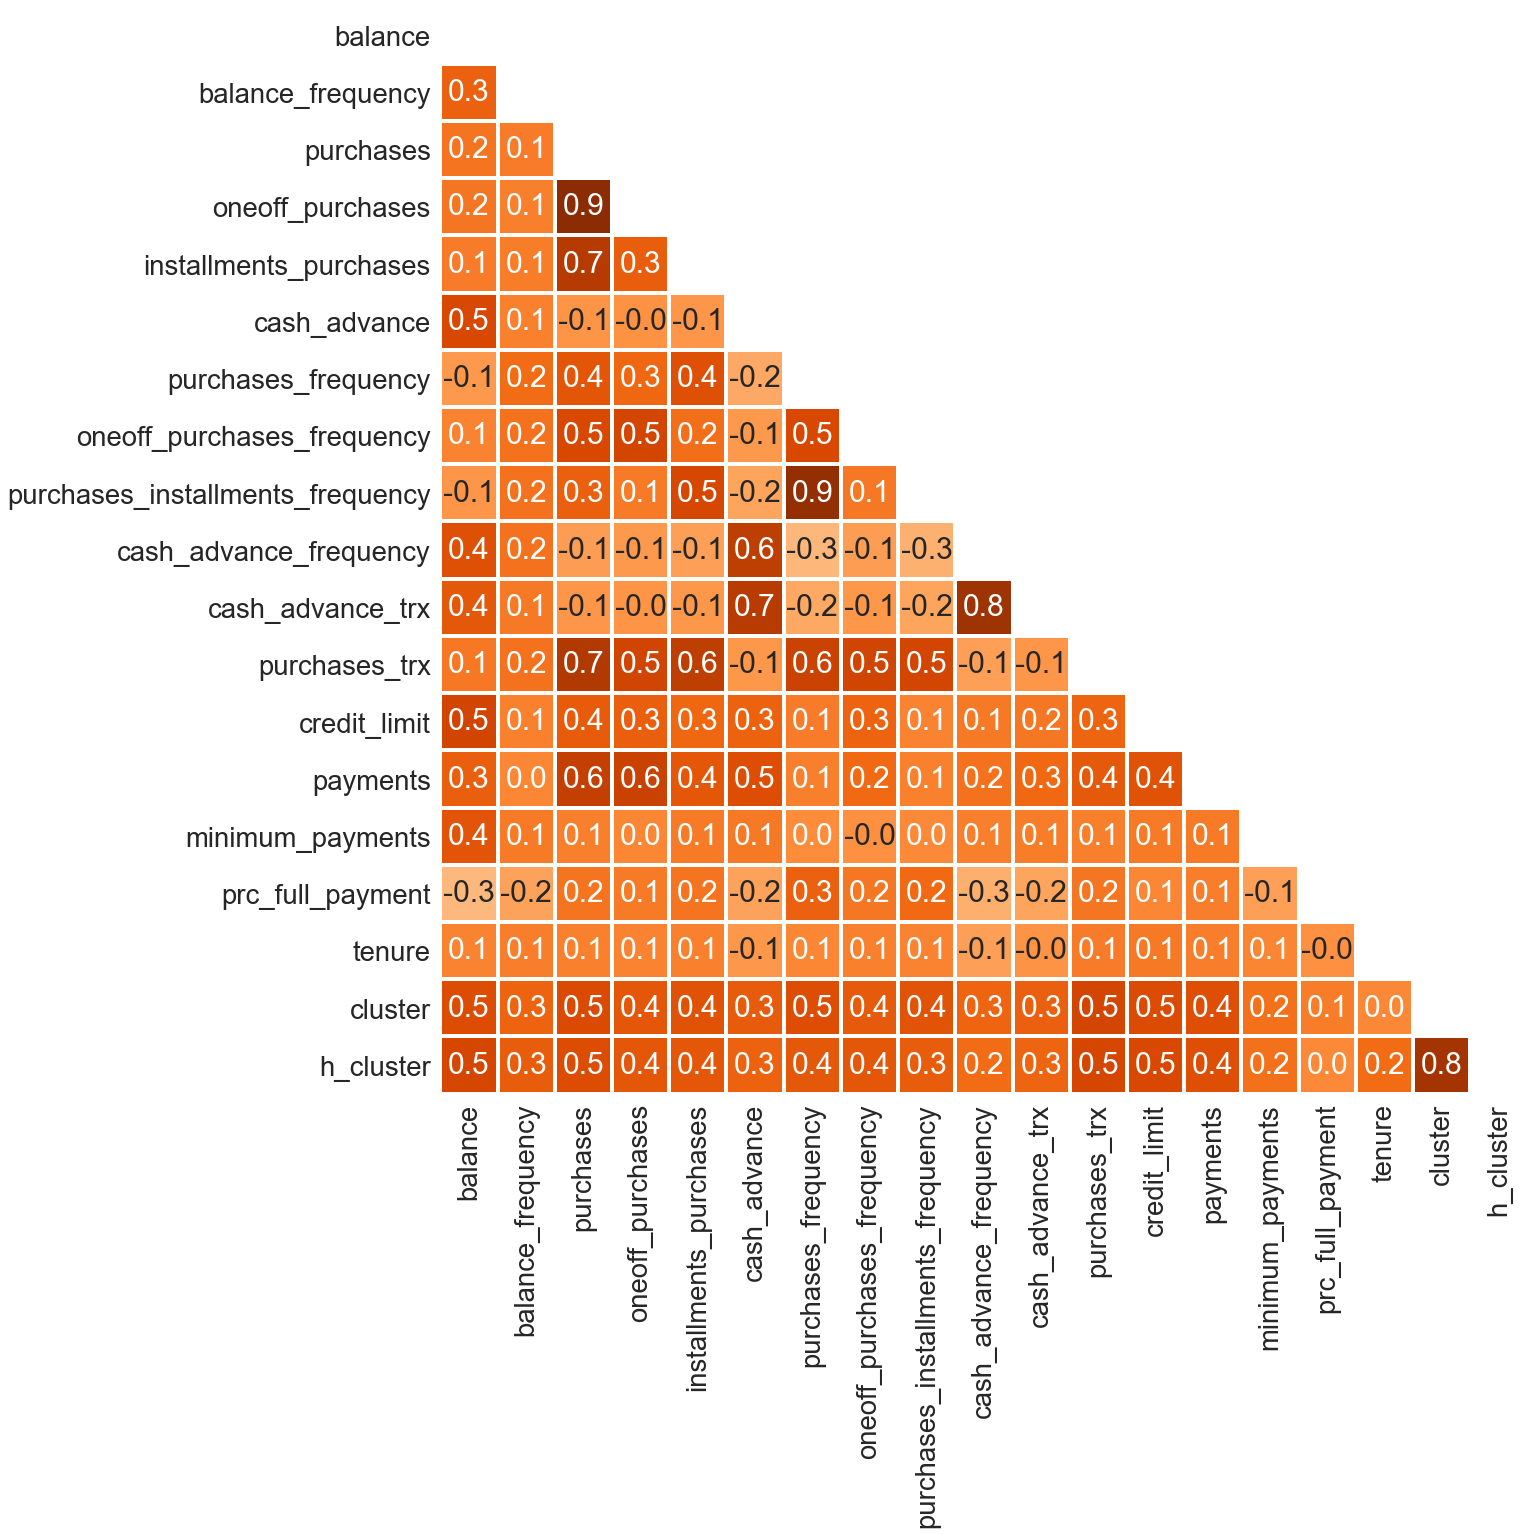

In [34]:
## Correlation matrix
plt.figure(figsize=(20, 20))
sns.set(font_scale=2.5, style="whitegrid")
correlation_matrix = df.corr()
# sns.heatmap(df.corr())


matrix = np.triu(df.corr())
sns.heatmap(
    correlation_matrix,
    mask=matrix,
    vmax=1,
    vmin=-1,
    square=True,
    cmap="Oranges",
    annot=True,
    fmt=".1f",
    linewidth=3,
    linecolor="white",
    cbar=False,
)
plt.xticks(rotation=90);

# PCA

The purpose of the PCA study here is to understand if there are a limited number of features which can explain most of the variations in the feature space. If we could determine only 2 or 3 features are important we can use those features for 2D/3D plotting and visualizing the clusters. It is important to do standardization before PCA to avoid having outliers determine the structure of PCA. Here 80% of the variance can be explained by the first 7 components. Therefore, PCA cannot help us much with making 2D/3D plots after clustering. Therefore I won't use it. 

In [11]:
## Scaling the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df.iloc[:, 1:])

In [12]:
## How much variance we can capture with only two principal components
pca = PCA(n_components=2)
pca_fitted = pca.fit_transform(X_std)
principalDf = pd.DataFrame(
    data=pca_fitted, columns=["principal component 0", "principal component 1"]
)

print(
    "Explained variation per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variation per principal component: [0.27231177 0.20374308]


In [13]:
## Structure of these two components based on the original features
print("pca components:\n", pca.components_)

pca components:
 [[ 0.09198554  0.10981227  0.41215118  0.34677532  0.33705558 -0.03058773
   0.32366483  0.2947613   0.27722627 -0.09914536 -0.05696032  0.39106662
   0.2100521   0.26372558  0.05932642  0.13056491  0.07791863]
 [ 0.40597942  0.12773854  0.04953037  0.06992969 -0.01148122  0.43724697
  -0.18658162 -0.01474647 -0.17357694  0.42999685  0.41641174 -0.01194676
   0.24382257  0.26418161  0.17041556 -0.19570867 -0.00456549]]


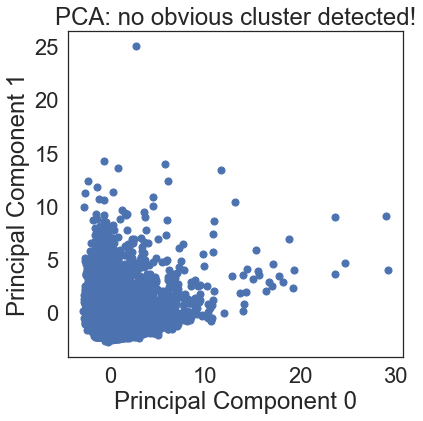

In [14]:
## Visualizing the data on the first and second PCs: no obvious clusters using the first 2 PCs
sns.set(font_scale=2, style="white")
plt.figure(figsize=(6, 6))
plt.xlabel("Principal Component 0")
plt.ylabel("Principal Component 1")
plt.title("PCA: no obvious cluster detected!")


plt.scatter(
    principalDf.loc[:, "principal component 0"],
    principalDf.loc[:, "principal component 1"],
    s=50,
)

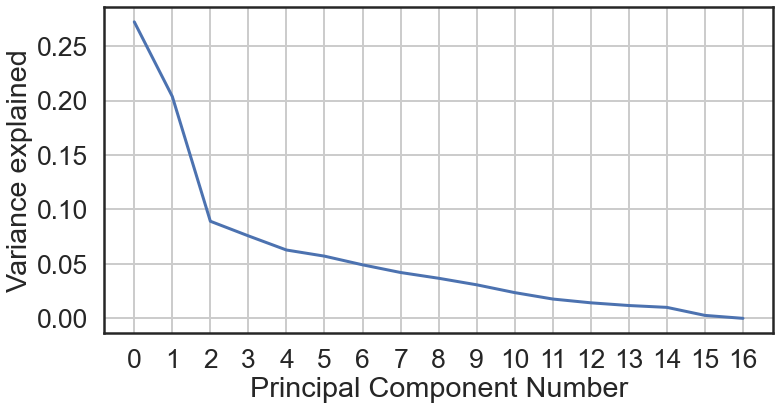

In [15]:
## PCA without specifying n_components to get all of them
sns.set_context("poster", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 6))

pca = PCA()
pca.fit(X_std)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
ax.set_xlabel("Principal Component Number")
ax.set_ylabel("Variance explained")
ax.set_xticks([x for x in range(len(pca.explained_variance_ratio_))])
ax.grid()

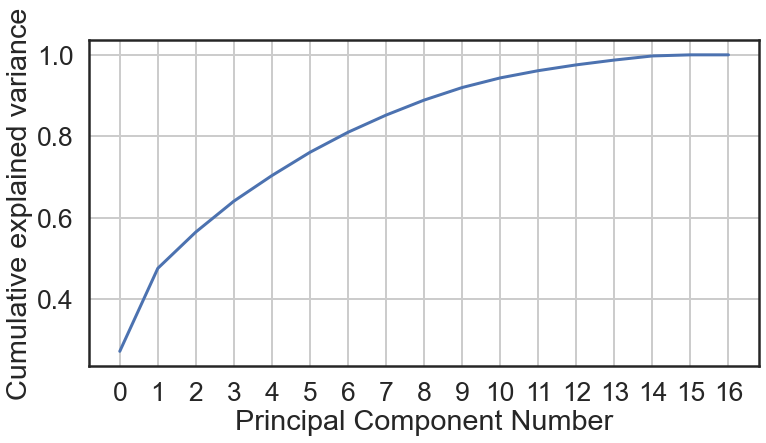

In [16]:
## Cumulative variance explained by components
## 80% of variance was explained by first 7 PCs
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel("Principal Component Number")
ax.set_ylabel("Cumulative explained variance")
ax.set_xticks([x for x in range(len(pca.explained_variance_ratio_))])
ax.grid()

# Kmeans

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) choosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

## Selecting K

The Elbow Method is one of the most popular methods to determine this optimal value of k. The idea behind the elbow method is to identify the value of k where the score begins to decrease most rapidly before the Inertia curve reaches a plateau. Inertia is the sum of squared distances of samples to their closest cluster center. 

Another method is using the Silhouette score. The silhouette value for every data point is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The cluster number with the maximum average Silhouette score would be the optimum one. In this problem, Silhouette scores for clusters between 2 to 13 are all close and vary between 0.2 to 0.24, so there is no real winner. 

I selected k=4 based on the elbow method and observing a decrease in the Inertia slope after 4 clusters. However, the elbow does not have a sharp bend that we would like to see in the inertia plots. Therefore, I plan to use another clustering algorithm later that could work better for this data. 


In [17]:
## Calculating Inertia (sum of squared distances from the cluster centers) as a function of number of clusters

SS = []
D = []
DB = []
SIL = []
for k in range(1, 13):
    model = KMeans(n_clusters=k, init="random", random_state=0)
    model.fit(X_std)
    clusters = model.labels_

    SS.append(model.inertia_)
    D.append(
        sum(np.min(cdist(X_std, model.cluster_centers_, "euclidean"), axis=1))
        / X_std.shape[0]
    )
    if k >= 2:
        SIL.append(silhouette_score(X_std, clusters))

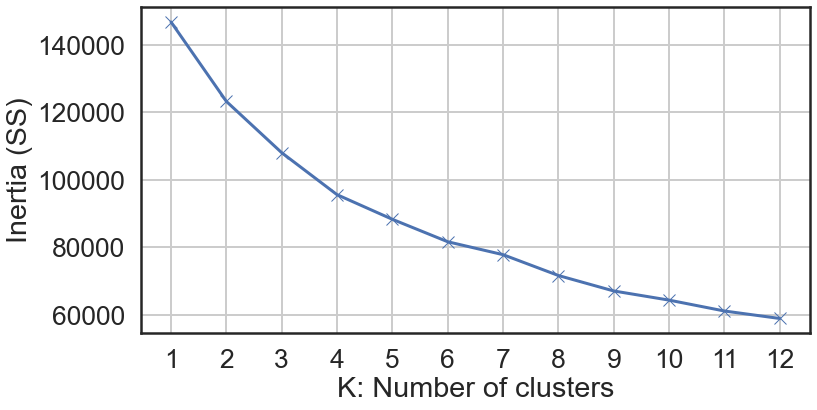

In [18]:
## Plotting Inertia vs number of clusters
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(1, 13), SS, "bx-")
plt.xlabel("K: Number of clusters")
plt.xticks(range(1, 13))
plt.ylabel("Inertia (SS)")
plt.grid()

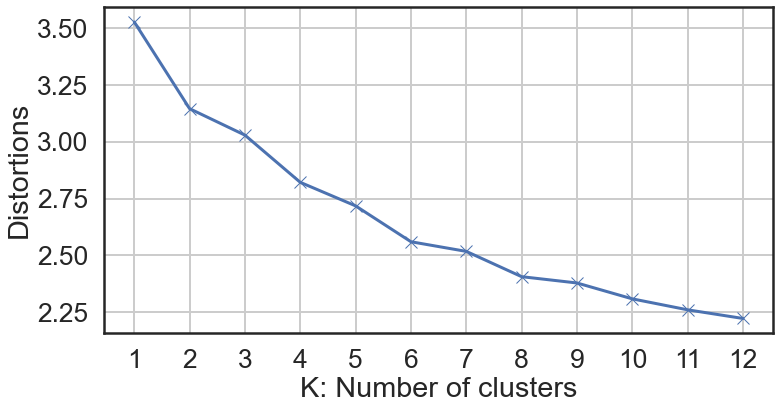

In [19]:
## Plotting Distortion vs number of clusters
## Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(1, 13), D, "bx-")
plt.xlabel("K: Number of clusters")
plt.xticks(range(1, 13))
plt.ylabel("Distortions")
plt.grid()

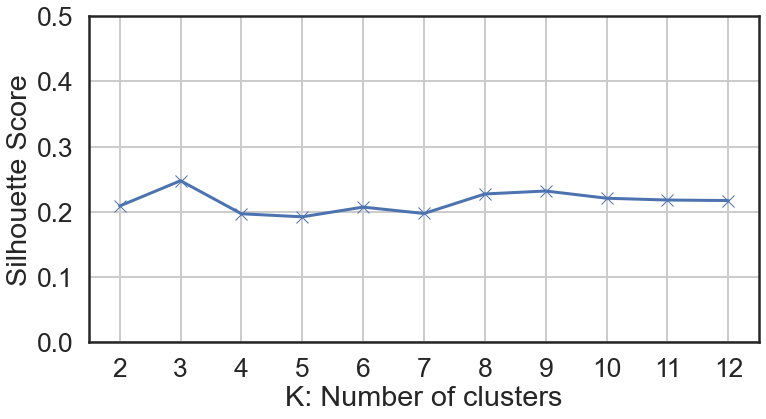

In [20]:
## Plotting Silhouette Score vs number of clusters
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(range(2, 13), SIL, "bx-")
plt.xlabel("K: Number of clusters")
plt.xticks(range(2, 13))
plt.ylabel("Silhouette Score")
plt.ylim((0, 0.5))
plt.grid()

In [21]:
## I have selected k=4 based on the elbow method
## Cluster sizes
k = 4
model = KMeans(n_clusters=k, random_state=1)
model.fit(X_std)

## Counting the number of units in each cluster
# labels = model.predict(X_std)
# counter = {}

# for label in labels:  # or use scipy.stats.itemfreq
#     if label not in counter:
#         counter[label] = 1
#     else:
#         counter[label] += 1

# fig, ax = plt.subplots(figsize=(8, 5))
# plt.bar(counter.keys(), counter.values())
# plt.xlabel("Cluster Number")
# plt.ylabel("Cluster Size")
# plt.xticks(range(0, k)); 

KMeans(n_clusters=4, random_state=1)

## Comparing Clusters

In [22]:
## Labeling the rows with cluster numbers
kmeans = KMeans(n_clusters=4, init="random", random_state=0).fit(X_std)
df["cluster"] = kmeans.labels_

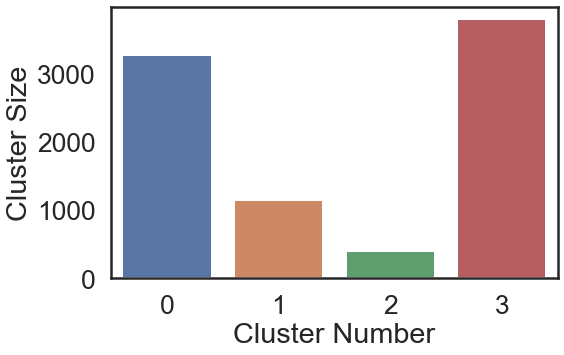

In [23]:
## Counting the number of units in each cluster
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='cluster', data=df)
plt.xlabel("Cluster Number")
plt.ylabel("Cluster Size");

In [24]:
## Rename the clusters to make comparison easier, start the numbering from one not zero
def cluster_name_changer(x):
    dic = {0: 2, 3: 1, 1: 3, 2: 4}
    return dic[x]


df["cluster"] = df["cluster"].apply(lambda x: cluster_name_changer(x))

In [25]:
## Compare the mean of the clusters
df.groupby("cluster").mean().transpose()

cluster                                     1            2            3  \
balance                           1061.245064   914.398598  4654.668634   
balance_frequency                    0.818901     0.946186     0.969185   
purchases                          273.943703  1264.766249   504.585671   
oneoff_purchases                   210.942878   611.185037   319.242797   
installments_purchases              63.279848   653.862529   185.430900   
cash_advance                       606.661232   218.782441  4588.716197   
purchases_frequency                  0.174488     0.887337     0.290148   
oneoff_purchases_frequency           0.087724     0.302426     0.139707   
purchases_installments_frequency     0.083122     0.713626     0.187588   
cash_advance_frequency               0.119162     0.043855     0.487532   
cash_advance_trx                     2.211038     0.816880    14.457143   
purchases_trx                        2.997898    22.507313     7.752381   
credit_limit                      3259.159877  4255.521101  7648.099174   
payments                          1013.575184  1373.920198  3556.710634   
minimum_payments                   573.842255   649.503571  2038.647135   
prc_full_payment                     0.084056     0.274251     0.035357   
tenure                              11.479106    11.601158    11.385281   

cluster                                     4  
balance                           3586.147809  
balance_frequency                    0.986840  
purchases                         7816.070736  
oneoff_purchases                  5194.559518  
installments_purchases            2623.034061  
cash_advance                       658.230083  
purchases_frequency                  0.944589  
oneoff_purchases_frequency           0.737344  
purchases_installments_frequency     0.786971  
cash_advance_frequency               0.070831  
cash_advance_trx                     2.098985  
purchases_trx                       90.347716  
credit_limit                      9775.380711  
payments                          7454.041676  
minimum_payments                  2016.140976  
prc_full_payment                     0.291842  
tenure                              11.949239

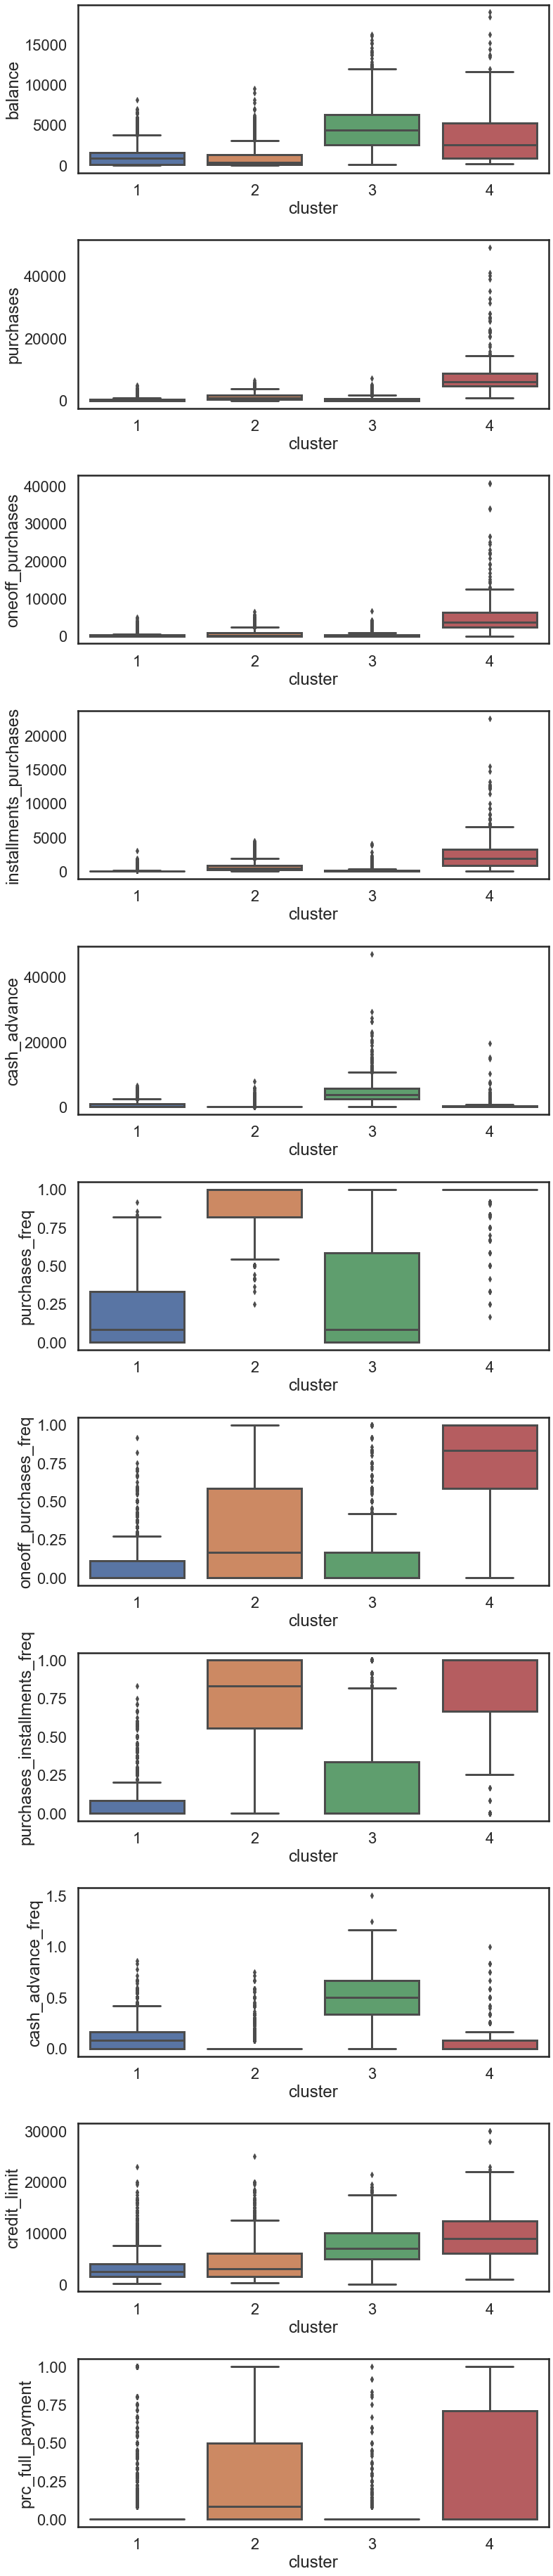

In [26]:
## boxplots
sns.set_context("poster", font_scale=1)
cols_to_plot = [
    "balance",
    "purchases",
    "oneoff_purchases",
    "installments_purchases",
    "cash_advance",
    "purchases_frequency",
    "oneoff_purchases_frequency",
    "purchases_installments_frequency",
    "cash_advance_frequency",
    "credit_limit",
    "prc_full_payment",
]
n = len(cols_to_plot)

fig, ax = plt.subplots(n, 1, figsize=(12, 6 * n))
for i in range(n):
    sns.boxplot(x="cluster", y=cols_to_plot[i], data=df, ax=ax[i])
    ## shorten the ylabels
    if cols_to_plot[i][-9:] == "frequency":
        y_label = cols_to_plot[i][:-9] + "freq"
        ax[i].set_ylabel(y_label)
fig.subplots_adjust(hspace=0.4)

# Hierarchical Clustering

There are two types of Hierarchical clustering techniques:

1. Agglomerative clustering which is a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined. 

2. Divisive clustering which is a top down approach. We start with one giant cluster including all data points. Then the data points are separated into different clusters. This method is less popular.

How do the algorithms identify closest clusters? There are a few methods to measure the similarity. Ward's linkage is one of the popular ones. In general "linkage" specifies how the distance between two clusters is calculated. Ward’s linkage minimizes the within variance of the clusters being merged. Least increase in total variance around cluster centroids is aimed. In K-means we were trying to minimize the sum of squared distances from the cluster centers (inertia) to plot our elbow method chart, here it’s almost the same; however, instead of minimizing inertia we are minimizing the within-cluster variance.


Here I will use Agglomerative clustering with Ward's linkage.

## Building a agglomerative clustering model

In [27]:
## Building the Agglomerative model
## distinace threshold = 0 means can fill out entire dendrogram
hc = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, affinity="euclidean", linkage="ward"
)
## Fit the model
hc.fit(X_std)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

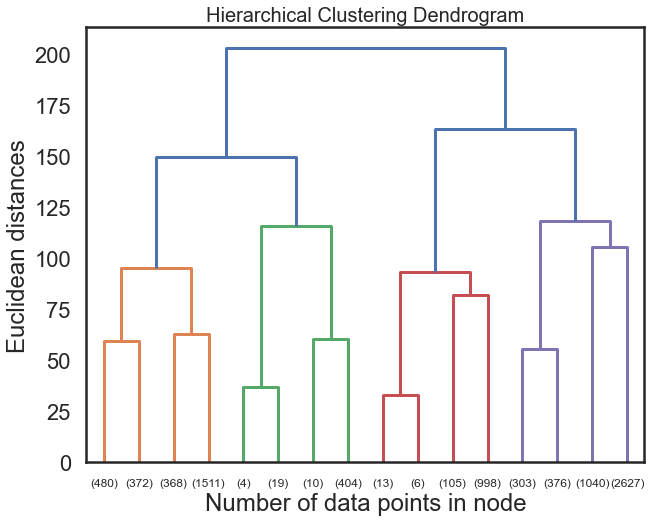

In [28]:
## A Dendrogram is a tree-like diagram that records the sequences of merges or splits.
## Create linkage matrix and then plot the dendrogram

def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


## Plot the top 3 levels of the dendrogram
plt.figure(figsize = (10,8))
plot_dendrogram(hc, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram', size = 20)
plt.xlabel("Number of data points in node") # (or index of point if no parenthesis)
plt.ylabel('Euclidean distances');

## Selecting the number of clusters and comparison

Dendrograms helps in showing progressions as clusters are merged. It also demonestrates how each cluster is composed of its child nodes. From the dendrogram we can realize that a good candidate for the number of clusters is four and that two of the clusters (red and orange) have better seperation from the rest compared to the other two. In general the separation between the four clusters is not as much as we would like since the amount of the jump in the Euclidean distances by merging the lower level clusters is not very large.

In [29]:
## Selecting 4 clusters
hc4 = AgglomerativeClustering(n_clusters=4,
                                  affinity='euclidean',
                                  linkage='ward')  
hc4.fit_predict(X_std)
df['h_cluster'] = hc4.labels_

In [30]:
## Rename the clusters to make comparison easier, start the numbering from one not zero
def cluster_name_changer(x):
    dic = {0: 1, 3: 2, 1: 4, 2: 3}
    return dic[x]

df['h_cluster'] = df['h_cluster'].apply(lambda x: cluster_name_changer(x))

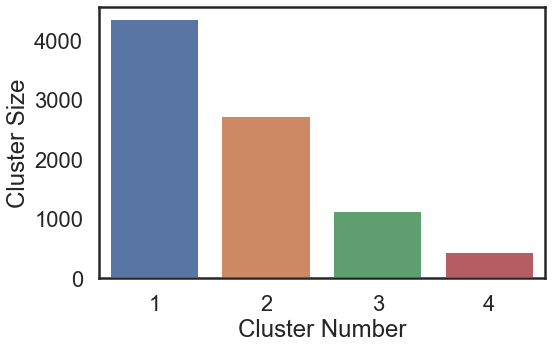

In [31]:
## Size of the clusters
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='h_cluster', data=df)
plt.xlabel("Cluster Number")
plt.ylabel("Cluster Size");

In [32]:
## Compare the mean of the clusters
## One quick dirty way to compare these results with Kmeans labels is to look at the last row "cluster"
## which is the avg of previously assigned Kmeans labels for the points inside these new clusters 
df.groupby('h_cluster').mean().transpose()

h_cluster                                   1            2            3  \
balance                            979.609234   954.735370  4695.246244   
balance_frequency                    0.813965     0.975482     0.976833   
purchases                          338.900152  1385.719044   516.485713   
oneoff_purchases                   209.611742   709.145632   333.451417   
installments_purchases             129.627200   676.753047   183.144519   
cash_advance                       651.253000   286.676850  4167.246654   
purchases_frequency                  0.261787     0.893277     0.259272   
oneoff_purchases_frequency           0.090834     0.333145     0.141404   
purchases_installments_frequency     0.169404     0.700948     0.161969   
cash_advance_frequency               0.119777     0.050301     0.442056   
cash_advance_trx                     2.293833     1.007689    13.413547   
purchases_trx                        4.463185    23.716221     7.625668   
credit_limit                      3234.823232  4430.276955  7805.748663   
payments                           946.141268  1577.517889  3759.561600   
minimum_payments                   625.426832   539.832131  2217.096414   
prc_full_payment                     0.112638     0.283814     0.037234   
tenure                              11.169351    11.939216    11.795009   
cluster                              1.230557     2.036250     2.667558   

h_cluster                                   4  
balance                           3879.514557  
balance_frequency                    0.988517  
purchases                         6908.217849  
oneoff_purchases                  4581.572037  
installments_purchases            2328.018810  
cash_advance                       679.151156  
purchases_frequency                  0.950319  
oneoff_purchases_frequency           0.720803  
purchases_installments_frequency     0.807517  
cash_advance_frequency               0.078805  
cash_advance_trx                     1.940503  
purchases_trx                       84.908467  
credit_limit                      9467.048055  
payments                          6344.149755  
minimum_payments                  1794.436496  
prc_full_payment                     0.158697  
tenure                              11.965675  
cluster                              3.450801

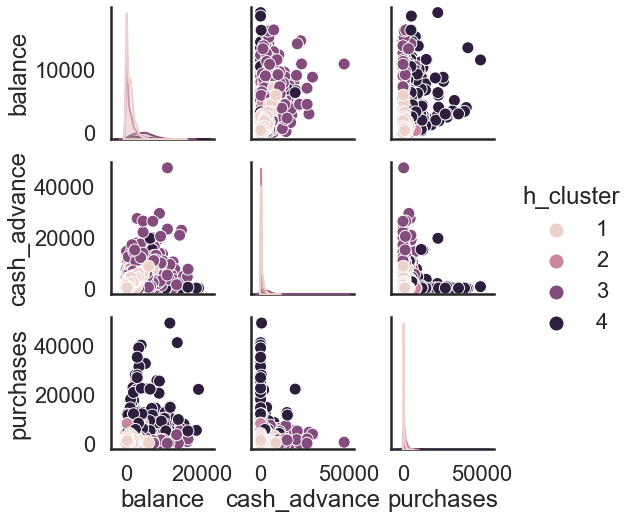

In [33]:
sns.pairplot(df[['balance', 'cash_advance', 'purchases', 'h_cluster']], hue='h_cluster');